# Loss Functions

In this exercise, you will compare the effects of Loss functions on a `LinearRegression` model.

👇 Let's download a CSV file to use for this challenge and parse it into a DataFrame

In [23]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor

In [1]:
import pandas as pd

data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/loss_functions_dataset.csv")
data.sample(5)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Average Temperature
386,0.98,514.5,294.0,110.25,7.0,0.25,29.135
723,0.98,514.5,294.0,110.25,7.0,0.40,33.370
87,0.66,759.5,318.5,220.50,3.5,0.10,12.670
582,0.90,563.5,318.5,122.50,7.0,0.40,35.500
233,0.64,784.0,343.0,220.50,3.5,0.10,17.220


🎯 Your task is to predict the average temperature inside a greenhouse based on its design. Your temperature predictions will help you select the appropriate greenhouse design for each plant, based on their climate needs. 

🌿 You know that plants can handle small temperature variations, but are exponentially more sensitive as the temperature variations increase. 

## 1. Theory 

❓ Theoretically, which Loss function would you train your model on to limit the risk of killing plants?

<details>
<summary> 🆘 Answer </summary>
    
By theory, you would use a Mean Square Error (MSE) Loss function. It would penalize outlier predictions and prevent your model from committing large errors. This would ensure smaller temperature variations and a lower risk for plants.

</details>

Mean Square Error

## 2. Application

### 2.1 Preprocessing

In [3]:
y = data["Average Temperature"]
X = data.drop("Average Temperature", axis=1)

❓ Standardise the features

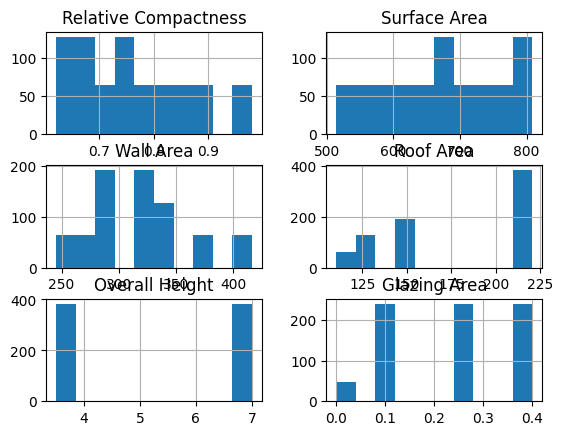

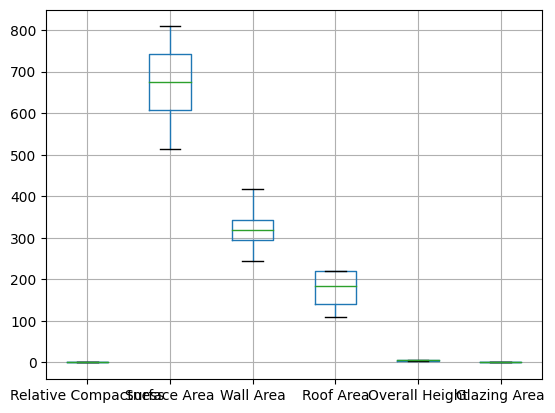

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
X.hist()
plt.show()
X.boxplot()
plt.show()


In [19]:
minmax_scaler = MinMaxScaler().set_output(transform="pandas")
minmax_scaler.fit(X)
X_scaled = minmax_scaler.transform(X)

X_scaled.head(2)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area
0,1.0,0.0,0.285714,0.0,1.0,0.0
1,1.0,0.0,0.285714,0.0,1.0,0.0


### 2.2 Modeling

In this section, you are going to verify the theory by evaluating models optimized on different Loss functions.

### Least Squares (MSE) Loss

❓ **10-Fold Cross-validate** a Linear Regression model optimized by **Stochastic Gradient Descent** (SGD) on a **Least Squares Loss** (MSE)



In [42]:
sdg_regressor_se = SGDRegressor(loss="squared_error")
cv_results = cross_validate(
    estimator=sdg_regressor_se, X=X_scaled, y=y, cv=10, scoring=["r2", "max_error"]
)
cv_results = pd.DataFrame(cv_results)
cv_results

,fit_time,score_time,test_r2,test_max_error
0,0.031028,0.009116,0.774923,-9.293553
1,0.025847,0.011217,0.898840,-9.181298
2,0.019908,0.009159,0.886700,-9.334421
3,0.024419,0.004043,0.877457,-9.620326
4,0.025240,0.012971,0.925724,-9.391947
5,0.031565,0.008629,0.892395,-9.116924
6,0.022547,0.008086,0.923672,-9.167161
7,0.014940,0.005586,0.912423,-9.531464
8,0.018235,0.008242,0.891952,-8.930142
9,0.033496,0.006175,0.934443,-8.213553


❓ Compute 
- the mean cross-validated R2 score and save it in the variable `r2`
- the single biggest prediction error in °C of all your folds and save it in the variable `max_error_celsius`?

(Tips: `max_error` is an accepted scoring metric in sklearn)

In [43]:
r2 = cv_results["test_r2"].mean()
max_error_celsius = cv_results["test_max_error"].min()
print("R2:", r2)
print("Max error:", max_error_celsius)

R2: 0.8918528616690488
Max error: -9.620325542858968


### Mean Absolute Error (MAE) Loss

What if we optimize our model on the MAE instead?

❓ **10-Fold Cross-validate** a Linear Regression model optimized by **Stochastic Gradient Descent** (SGD) on a **MAE** Loss

<details>
<summary>💡 Hints</summary>

- MAE loss cannot be directly specified in `SGDRegressor`. It must be engineered by adjusting the right parameters

</details>

In [44]:
sdg_regressor_mae = SGDRegressor(loss="epsilon_insensitive", epsilon=0)
cv_results = cross_validate(
    estimator=sdg_regressor_mae, X=X_scaled, y=y, cv=10, scoring=["r2", "max_error"]
)
cv_results = pd.DataFrame(cv_results)
cv_results

,fit_time,score_time,test_r2,test_max_error
0,0.017602,0.003778,0.726306,-11.472590
1,0.010174,0.003639,0.866688,-9.965041
2,0.010357,0.003667,0.867797,-10.411650
3,0.011258,0.004655,0.841612,-10.984577
4,0.014249,0.003276,0.905120,-11.206445
5,0.008231,0.003205,0.855994,-11.214974
6,0.009232,0.006650,0.912755,-10.712864
7,0.009193,0.005196,0.869663,-12.054595
8,0.008975,0.004411,0.867398,-11.449133
9,0.010817,0.004381,0.924172,-10.854394


❓ Compute 
- the mean cross-validated R2 score, store it in `r2_mae`
- the single biggest prediction error of all your folds, store it in `max_error_mae`?

In [45]:
r2_mae = cv_results["test_r2"].mean()
max_error_mae = cv_results["test_max_error"].min()
print("R2:", r2_mae)
print("Max error:", max_error_mae)

R2: 0.863750668314492
Max error: -12.054595019271936


## 3. Conclusion

❓Which of the models you evaluated seems the most appropriate for your task?

<details>
<summary> 🆘Answer </summary>
    
Although mean cross-validated r2 scores are approximately similar between the two models, the one optimized on a MAE has more chance to make larger mistakes from time to time, increasing the risk of killing plants!

    
</details>

The Squared Error model.

# 🏁 Check your code and push your notebook

In [46]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'loss_functions',
    r2 = r2,
    r2_mae = r2_mae,
    max_error = max_error_celsius,
    max_error_mae = max_error_mae
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/05-ML/04-Under-the-hood/data-loss-functions/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 3 items

test_loss_functions.py::TestLossFunctions::test_max_error_order PASSED   [ 33%]
test_loss_functions.py::TestLossFunctions::test_r2 PASSED                [ 66%]
test_loss_functions.py::TestLossFunctions::test_r2_mae PASSED            [100%]

============================== 3 passed in 0.22s ===============================


💯 You can commit your code:

git add tests/loss_functions.pickle

git commit -m 'Completed loss_functions step'

git push origin master

